In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq

import warnings
warnings.filterwarnings('ignore')

π = np.pi

In [2]:
def get_signal(path, number_of_points):

    data = np.genfromtxt(path, delimiter='\t').T
    time = data[0] *512/400
    signal = data[1]
    time = time[:number_of_points]
    signal = signal[:number_of_points]
    N = len(time)                           ## number of points
    Δt = time[1]-time[0]                    ## timestep = how often signal is sampled
    f_Nyq = 1/(2*Δt)                        ## Nyquist frequency
    print("number of points {:} Nyquist frequency: {:}".format(N, f_Nyq))   
    return time, signal, N, Δt, f_Nyq


In [3]:
def get_power_spectrum(signal, N,  Δt):
    
    signal_fft = fft(signal, norm = 'ortho')        ###  DFT  
    frequency = fftfreq(N, Δt)[:N//2]               ###  only non-negative frequenties

    power_spectrum = np.zeros(N//2)
    power_spectrum[0] = np.abs(signal_fft[0])**2
    power_spectrum[-1] = np.abs(signal_fft[N//2])**2
    for n in range(1, N//2):
        power_spectrum[n]= np.abs(signal_fft[n])**2 + np.abs(signal_fft[-n])**2
    
    return frequency, power_spectrum

In [4]:
def plot_signal(time, signal):
    
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    axs[0].scatter(time, signal, c='darkblue', s=1)
    axs[1].plot(time, signal, c='purple')

    for ax in axs:
        ax.set_xlabel('time')
        ax.set_ylabel('signal')
        ax.grid(True)
    plt.show()




def plot_power_spectrum(frequency, power_spectrum):
    fig, axs = plt.subplots(1, 2, figsize=(15,5))

    axs[0].stem(frequency, power_spectrum, linefmt='grey', markerfmt='.')
    axs[1].stem(frequency, power_spectrum, linefmt='grey', markerfmt='.')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')

    axs[1].set_ylim(1e-6, 1e4)

    for ax in axs:
        ax.set_xlabel('frequency')
        ax.set_ylabel('Power spectrum density')
        ax.grid(True)
        ax.set_ylim(1e-6, 1e4)

    plt.show()

In [5]:
def maslo_filter(signal):
    a = [0.00093029221036169,0.0046514610518084,0.0093029221036169,0.0093029221036169,0.0046514610518084,0.00093029221036169]
    b = [3.1207081013357,-4.1320001157791,2.84322526468123,-1.00826536855252,0.146562767583152 ]
    
    fsignal = signal*0.0
    
    for i in range(len(signal)):
        for j in range(6):
            if j - i < 1:
                fsignal[i]+= signal[i-j] * a[j]
        for j in range(1,6):
            if j - i < 1:
                fsignal[i]+= fsignal[i-j] * b[j-1]

    return fsignal
    

In [6]:
path = 'assgn1.txt'
number_of_points = 4096

N0 = 0.55

time, signal, N, Δt, f_Nyq = get_signal(path, number_of_points)
frequency, power_spectrum = get_power_spectrum(signal, N, Δt)

number of points 4096 Nyquist frequency: 200.0


In [7]:
fsignal = maslo_filter(signal)

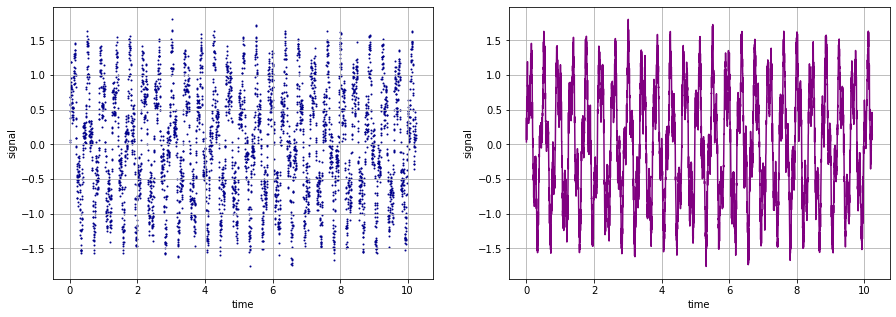

In [8]:
plot_signal(time, signal)

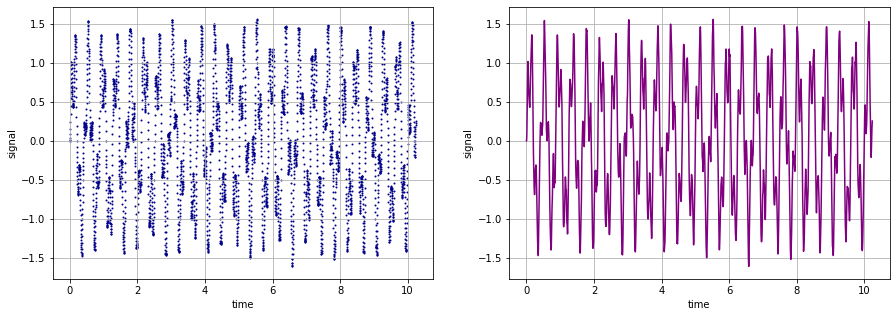

In [9]:
plot_signal(time, fsignal)

In [10]:
frequency, power_spectrum = get_power_spectrum(signal, N, Δt)
frequency, power_spectrum_filtred = get_power_spectrum(fsignal, N, Δt)

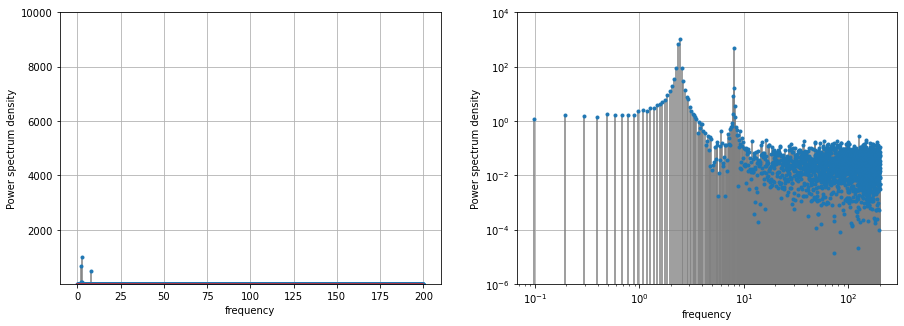

In [11]:
plot_power_spectrum(frequency, power_spectrum)

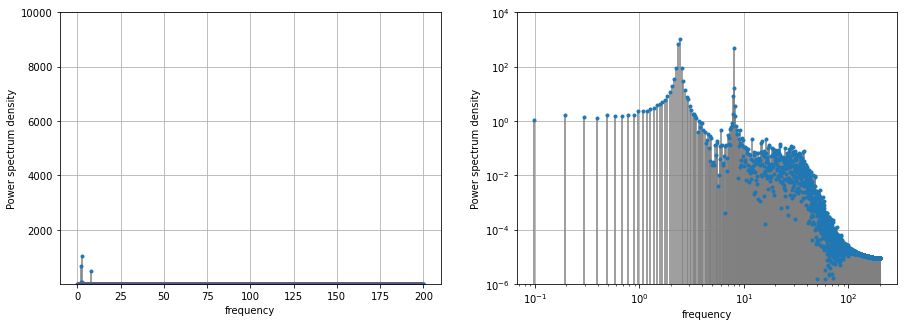

In [12]:
plot_power_spectrum(frequency, power_spectrum_filtred)